In [1]:
import pandas as pd
import numpy as np

In [2]:
nino34_df = pd.read_excel('PALMOIL_NINO.xlsx', sheet_name = 'Nino3.4')

In [ ]:
nino34_df.head()

In [ ]:
list(nino34_df.columns.values)[1:]

In [3]:
nino34 = pd.melt(nino34_df, id_vars=['year'], value_vars=list(nino34_df.columns.values)[1:], var_name='month', value_name='nino34')

In [4]:
nino34.head()

,year,month,nino34
0,1950,1,24.55
1,1951,1,25.24
2,1952,1,26.67
3,1953,1,26.74
4,1954,1,26.98


In [5]:
nino34['DATE'] = pd.to_datetime(nino34[['year', 'month']].assign(DAY=1))

In [6]:
nino34.head()

,year,month,nino34,DATE
0,1950,1,24.55,1950-01-01
1,1951,1,25.24,1951-01-01
2,1952,1,26.67,1952-01-01
3,1953,1,26.74,1953-01-01
4,1954,1,26.98,1954-01-01


In [7]:
palm = pd.read_excel('PALMOIL_NINO.xlsx', sheet_name = 'PALMOIL')

In [8]:
palm.head()

,DATE,PPOILUSDM
0,1990-01-01,230.555951
1,1990-02-01,223.945027
2,1990-03-01,236.340508
3,1990-04-01,220.639566
4,1990-05-01,232.208682


In [8]:
nino34.sort_values(by='DATE', inplace=True)

In [9]:
nino34

,year,month,nino34,DATE
0,1950,1,24.55,1950-01-01
71,1950,2,25.06,1950-02-01
142,1950,3,25.87,1950-03-01
213,1950,4,26.28,1950-04-01
284,1950,5,26.18,1950-05-01
...,...,...,...,...
567,2020,8,26.26,2020-08-01
638,2020,9,25.89,2020-09-01
709,2020,10,25.46,2020-10-01
780,2020,11,25.28,2020-11-01


In [10]:
df = palm.merge(nino34, how='inner', on='DATE')

In [11]:
df.head()

,DATE,PPOILUSDM,year,month,nino34
0,1990-01-01,230.555951,1990,1,26.56
1,1990-02-01,223.945027,1990,2,26.96
2,1990-03-01,236.340508,1990,3,27.33
3,1990-04-01,220.639566,1990,4,27.90
4,1990-05-01,232.208682,1990,5,28.02


In [15]:
def cross_corr(x, y, lag):
    return x.corr(y.shift(periods=lag))

In [16]:
nino_palm = [cross_corr(df['nino34'], df['PPOILUSDM'], lag=i) for i in range(11)]

In [17]:
nino_palm

[-0.21675263133024048,
 -0.20253883130439404,
 -0.19380269182779428,
 -0.19278913127223007,
 -0.19700558798400838,
 -0.20681770164090657,
 -0.22015411305560378,
 -0.23270991032707555,
 -0.24177752934728391,
 -0.23942538558846838,
 -0.2217716573264046]

In [20]:
import matplotlib.pyplot as plt

<ipython-input-25-46f285eb9aa4>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['DATE'], rotation=90)


[Text(-50.0, 0, '1990-01-01 00:00:00'),
 Text(0.0, 0, '1990-02-01 00:00:00'),
 Text(50.0, 0, '1990-03-01 00:00:00'),
 Text(100.0, 0, '1990-04-01 00:00:00'),
 Text(150.0, 0, '1990-05-01 00:00:00'),
 Text(200.0, 0, '1990-06-01 00:00:00'),
 Text(250.0, 0, '1990-07-01 00:00:00'),
 Text(300.0, 0, '1990-08-01 00:00:00'),
 Text(350.0, 0, '1990-09-01 00:00:00'),
 Text(400.0, 0, '1990-10-01 00:00:00')]

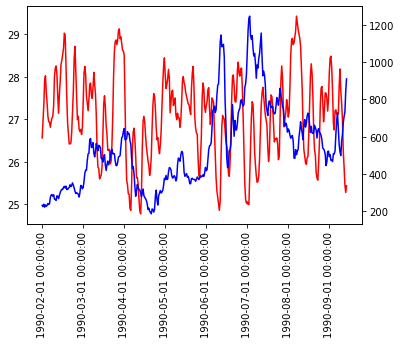

In [25]:
fig, ax = plt.subplots()
df.nino34.plot(ax=ax, style='r-')
df.PPOILUSDM.plot(ax=ax, style='b-', secondary_y=True)
ax.set_xticklabels(df['DATE'], rotation=90)